# Exploratory Data Analysis

### Analysis of biases and political opinion data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pmdarima as pm
import statsmodels.api as sm

sns.set_style("darkgrid")

from scipy.stats import pearsonr


%matplotlib inline

ModuleNotFoundError: No module named 'pmdarima'

In [5]:
df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\bias_total_pc_by_year.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\14802\\Desktop\\hate-crime analysis\\datasets\\bias_total_pc_by_year.csv'

In [ ]:
df = df.transpose().copy()

In [ ]:
df.columns = ['anti_american_indian_or_alaska_native',
 'anti_arab',
 'anti_asian',
 'anti_atheism_agnosticism',
 'anti_bisexual',
 'anti_black_or_african_american',
 'anti_buddhist',
 'anti_catholic',
 'anti_eastern_orthodox_russian_greek_other',
 'anti_female',
 'anti_gay_male',
 'anti_gender_non_conforming',
 'anti_heterosexual',
 'anti_hindu',
 'anti_hispanic_or_latino',
 'anti_islamic_muslim',
 'anti_jehovahs_witness',
 'anti_jewish',
 'anti_lesbian_female',
 'anti_male',
 'anti_mental_disability',
 'anti_mormon',
 'anti_native_hawaiian_or_other_pacific_islander',
 'anti_physical_disability',
 'anti_protestant',
 'anti_sikh',
 'anti_transgender',
 'anti_white',
 'anti_lgbtq_grouped']

In [ ]:
df = df[1:].copy()

In [2]:
df.reset_index(inplace=True)

NameError: name 'df' is not defined

In [3]:
df.rename(columns={'index':'year'}, inplace=True)

NameError: name 'df' is not defined

In [4]:
df.head()

NameError: name 'df' is not defined

In [9]:
political_df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\clean_pew_research.csv")

In [10]:
political_df.head()

,year,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,35.0,50.0,50.0,50.0,25.0,31
1,2001,35.0,50.0,48.2,50.0,25.0,31
2,2002,35.0,50.0,44.6,50.0,25.0,31
3,2003,32.6,47.0,43.2,46.0,44.0,24
4,2004,31.0,49.0,38.3,45.0,46.0,27


In [11]:
political_df

,year,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,35.0,50.0,50.0,50.0,25.0,31
1,2001,35.0,50.0,48.2,50.0,25.0,31
2,2002,35.0,50.0,44.6,50.0,25.0,31
3,2003,32.6,47.0,43.2,46.0,44.0,24
4,2004,31.0,49.0,38.3,45.0,46.0,27
5,2005,36.0,49.0,35.8,45.0,36.0,26
6,2006,35.6,51.0,30.1,41.0,36.0,26
7,2007,36.3,51.0,29.4,41.0,45.0,26
8,2008,39.0,51.0,19.1,41.0,45.0,26
9,2009,37.0,51.0,27.1,46.0,38.0,18


In [12]:
political_df.year = political_df.year.astype(str)

In [13]:
df = df.merge(political_df, on='year')

In [14]:
df.head()

,year,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism_agnosticism,anti_bisexual,anti_black_or_african_american,anti_buddhist,anti_catholic,anti_eastern_orthodox_russian_greek_other,...,anti_sikh,anti_transgender,anti_white,anti_lgbtq_grouped,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,0.021,0.013526,0.099662,0.001424,0.007475,1.04681,0.0,0.019932,0.0,...,0.0,0.0,0.322835,0.464497,35.0,50.0,50.0,50.0,25.0,31
1,2001,0.02749,0.089518,0.098681,0.001762,0.005286,1.030158,0.0,0.012688,0.0,...,0.0,0.0,0.290051,0.489175,35.0,50.0,48.2,50.0,25.0,31
2,2002,0.022697,0.028284,0.07647,0.000698,0.005587,0.891455,0.0,0.017808,0.0,...,0.0,0.0,0.281439,0.433681,35.0,50.0,44.6,50.0,25.0,31
3,2003,0.02458,0.004847,0.081701,0.003116,0.00277,0.891099,0.0,0.025964,0.0,...,0.0,0.0,0.288378,0.427201,32.6,47.0,43.2,46.0,44.0,24
4,2004,0.029156,0.0,0.076836,0.002058,0.005145,0.948439,0.0,0.019552,0.0,...,0.0,0.0,0.284017,0.398241,31.0,49.0,38.3,45.0,46.0,27


In [15]:
us_data = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\us_per_cap_totals.csv")

In [16]:
us_data = us_data[['year', 'total_incidents_per_capita']].copy()

In [17]:
us_data.year = us_data.year.astype(str)

In [18]:
df = df.merge(us_data, on='year')

In [19]:
df.rename(columns={"total_incidents_per_capita":"us_total_crimes_per_capita"}, inplace=True)

In [20]:
df.year = df.year.astype(int)

In [21]:
df.anti_gay_male = df.anti_gay_male.astype(float)

In [22]:
df.anti_lesbian_female = df.anti_lesbian_female.astype(float)

## Exploratory Data Analysis

In [23]:
df = df[['year', 'anti_black_or_african_american', 'anti_arab', 'anti_islamic_muslim', 'anti_gay_male', 'anti_lesbian_female', 'anti_hispanic_or_latino','us_total_crimes_per_capita', 'percent_favor_gay_marriage', 'percent_accepting_homosexuality', 'percent_satisfied_with_current_us', 'percent_favor_immigrants', 'percent_agree_islam_encourages_violence', 'percent_agree_discrimination_hurts_black_people']].copy()

## Exploratory Question: 

### Is there a relationship between the percentage of people who believe homomsexuality should be accepted  by society and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [24]:
pearsonr(df['anti_gay_male'], df['percent_accepting_homosexuality'])

(-0.5055942779471554, 0.01937866776998955)

The coefficient of -0.5055942779471553 and p-value of 0.01937866776998959 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

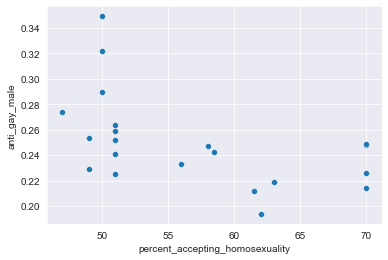

In [25]:
sns.scatterplot(x=df['percent_accepting_homosexuality'], y=df['anti_gay_male']);

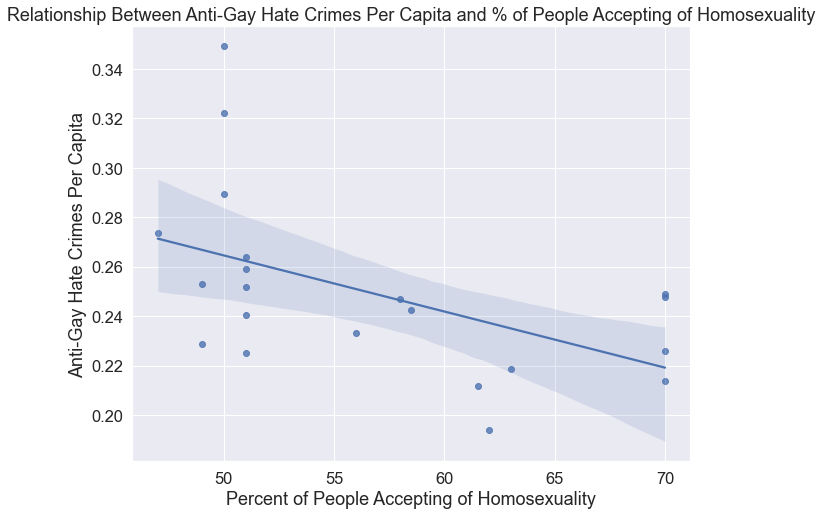

In [26]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig1 = sns.regplot(x=df['percent_accepting_homosexuality'], y=df['anti_gay_male'])
fig1.set(title="Relationship Between Anti-Gay Hate Crimes Per Capita and % of People Accepting of Homosexuality")
fig1.set_xlabel("Percent of People Accepting of Homosexuality")
fig1.set_ylabel("Anti-Gay Hate Crimes Per Capita");

#### Linear Regression:

In [27]:
X = df[['percent_accepting_homosexuality']]
y = df['anti_gay_male']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          anti_gay_male   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     6.525
Date:                Wed, 23 Mar 2022   Prob (F-statistic):             0.0194
Time:                        20:32:19   Log-Likelihood:                 43.392
No. Observations:                  21   AIC:                            -82.78
Df Residuals:                      19   BIC:                            -80.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3781      0.051      7.440      0.000       0.272       0.484
percent_accepting_homosexuality    -0.0023      0.001     -2.554      0.019      -0.004      -0.000
==============================================================================
Omnibus:                        6.986   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.591
Skew:                           1.046   Prob(JB):                        0.101
Kurtosis:                       3.934   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pearsonr(df['anti_lesbian_female'], df['percent_accepting_homosexuality'])

(-0.8017499838057308, 1.243257264362822e-05)

The coefficient of -0.8017499838057306 and p-value of 1.243257264362834e-05 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

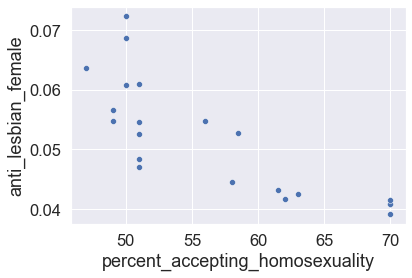

In [29]:
sns.scatterplot(x=df['percent_accepting_homosexuality'], y=df['anti_lesbian_female']);

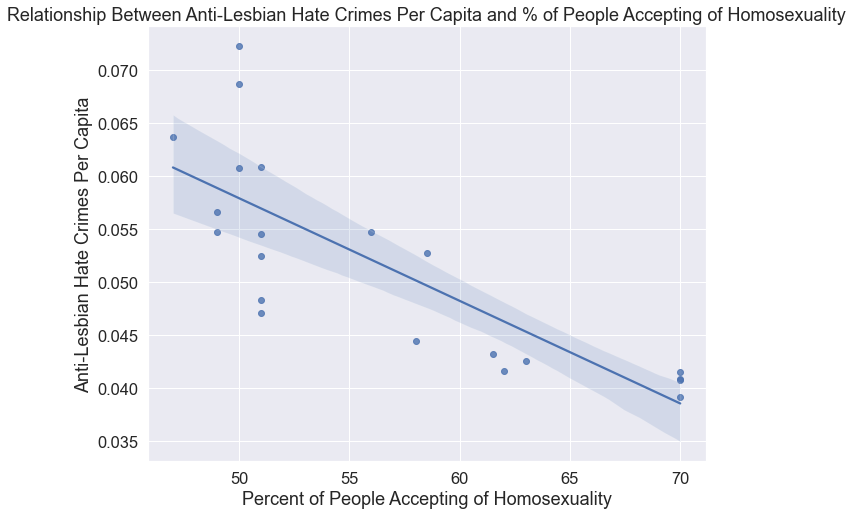

In [30]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig2 = sns.regplot(x=df['percent_accepting_homosexuality'], y=df['anti_lesbian_female'])
fig2.set(title="Relationship Between Anti-Lesbian Hate Crimes Per Capita and % of People Accepting of Homosexuality")
fig2.set_xlabel("Percent of People Accepting of Homosexuality")
fig2.set_ylabel("Anti-Lesbian Hate Crimes Per Capita");

#### Linear Regression

In [31]:
X = df['percent_accepting_homosexuality']
y = df['anti_lesbian_female']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     anti_lesbian_female   R-squared:                       0.643
Model:                             OLS   Adj. R-squared:                  0.624
Method:                  Least Squares   F-statistic:                     34.19
Date:                 Wed, 23 Mar 2022   Prob (F-statistic):           1.24e-05
Time:                         20:32:20   Log-Likelihood:                 78.708
No. Observations:                   21   AIC:                            -153.4
Df Residuals:                       19   BIC:                            -151.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1063      0.009     11.239      0.000       0.086       0.126
percent_accepting_homosexuality    -0.0010      0.000     -5.847      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.273
Skew:                           0.581   Prob(JB):                        0.529
Kurtosis:                       3.323   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Question: 

### Is there a relationship between the percentage of people who support gay and lesbian marriage and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [32]:
pearsonr(df['anti_gay_male'], df['percent_favor_gay_marriage'])

(-0.5542383764685135, 0.009129605621183293)

The coefficient of -0.5542383764685134 and p-value of 0.009129605621183317 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

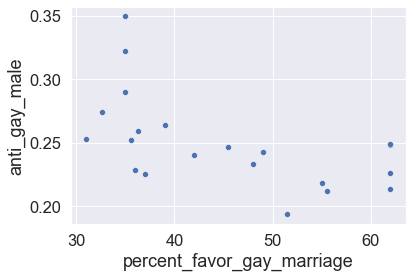

In [33]:
sns.scatterplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_gay_male']);

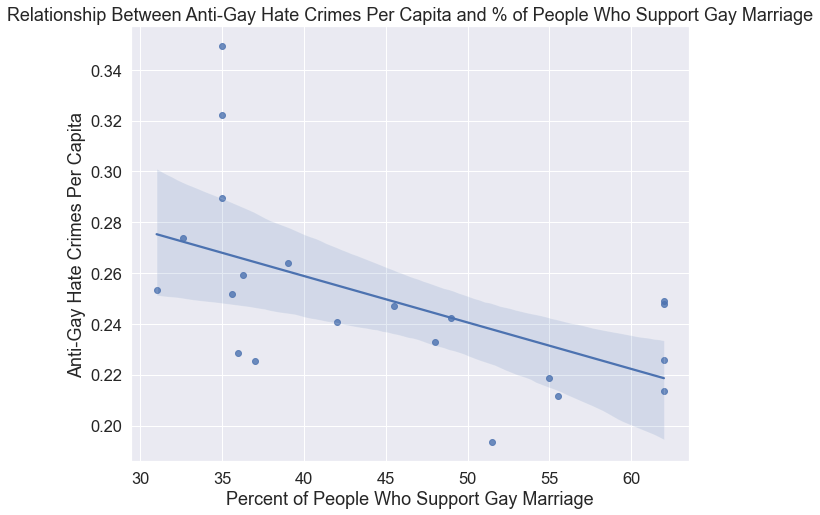

In [34]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig3 = sns.regplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_gay_male'])
fig3.set(title="Relationship Between Anti-Gay Hate Crimes Per Capita and % of People Who Support Gay Marriage")
fig3.set_xlabel("Percent of People Who Support Gay Marriage")
fig3.set_ylabel("Anti-Gay Hate Crimes Per Capita");

#### Linear Regression

In [35]:
X = df['percent_favor_gay_marriage']
y = df['anti_gay_male']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          anti_gay_male   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     8.424
Date:                Wed, 23 Mar 2022   Prob (F-statistic):            0.00913
Time:                        20:32:21   Log-Likelihood:                 44.146
No. Observations:                  21   AIC:                            -84.29
Df Residuals:                      19   BIC:                            -82.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3319      0.029     11.371      0.000       0.271       0.393
percent_favor_gay_marriage    -0.0018      0.001     -2.902      0.009      -0.003      -0.001
==============================================================================
Omnibus:                        6.436   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.092
Skew:                           0.983   Prob(JB):                        0.129
Kurtosis:                       3.903   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pearsonr(df['anti_lesbian_female'], df['percent_favor_gay_marriage'])

(-0.8174220397019578, 6.0704623900791585e-06)

The coefficient of -0.8174220397019577 and p-value 6.0704623900791915e-06 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

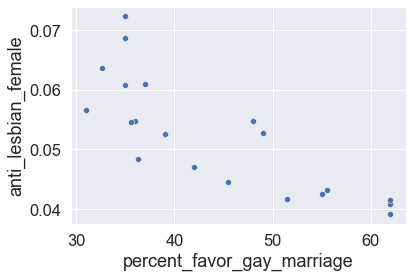

In [37]:
sns.scatterplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_lesbian_female']);

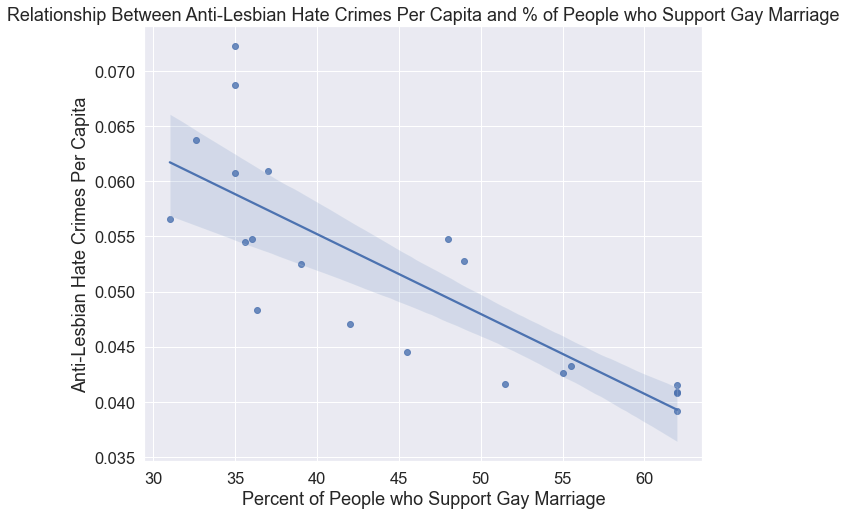

In [38]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig4 = sns.regplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_lesbian_female'])
fig4.set(title="Relationship Between Anti-Lesbian Hate Crimes Per Capita and % of People who Support Gay Marriage")
fig4.set_xlabel("Percent of People who Support Gay Marriage")
fig4.set_ylabel("Anti-Lesbian Hate Crimes Per Capita");

#### Linear Regression

In [39]:
X = df['percent_accepting_homosexuality']
y = df['anti_lesbian_female']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     anti_lesbian_female   R-squared:                       0.643
Model:                             OLS   Adj. R-squared:                  0.624
Method:                  Least Squares   F-statistic:                     34.19
Date:                 Wed, 23 Mar 2022   Prob (F-statistic):           1.24e-05
Time:                         20:32:22   Log-Likelihood:                 78.708
No. Observations:                   21   AIC:                            -153.4
Df Residuals:                       19   BIC:                            -151.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1063      0.009     11.239      0.000       0.086       0.126
percent_accepting_homosexuality    -0.0010      0.000     -5.847      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.273
Skew:                           0.581   Prob(JB):                        0.529
Kurtosis:                       3.323   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree Islamic beliefs encourage violence and the amount of anti-islamic hate crimes per capita?

In [40]:
pearsonr(df['anti_islamic_muslim'], df['percent_agree_islam_encourages_violence'])

(-0.20605504950694012, 0.3701921047027624)

Because the p-value here is well above .05, these results suggest no statistically significant relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

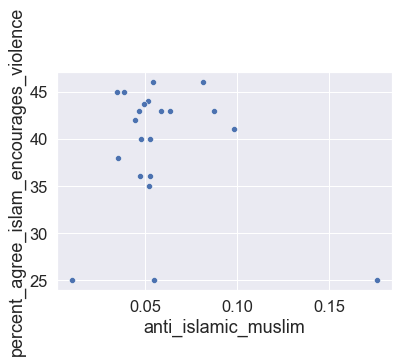

In [41]:
sns.scatterplot(data=df, x=df['anti_islamic_muslim'], y=df['percent_agree_islam_encourages_violence']);

As expected by the pearsonr calculation results, there does not appear to be any relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree racial discrimination makes it hard for many black people to "get ahead" and the amount of anti-black hate crimes per capita?

In [42]:
pearsonr(df['anti_black_or_african_american'], df['percent_agree_discrimination_hurts_black_people'])

(0.035836716210967554, 0.8774383232202404)

Based on the coeffiecient of 0.0358 and p-value of 0.878, there is no observed relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead. (For correlation, the closer the value is to -1 or 1, the higher the correlation. For p-value, the results are not considered statistically significant unless the p-value is under 0.05). 

<AxesSubplot:xlabel='anti_black_or_african_american', ylabel='percent_agree_discrimination_hurts_black_people'>

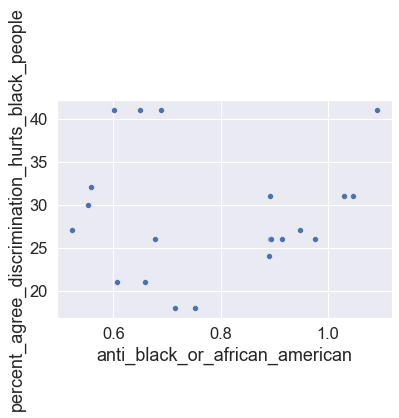

In [43]:
sns.scatterplot(data=df, x=df['anti_black_or_african_american'], y=df['percent_agree_discrimination_hurts_black_people'])

As expected by the pearsonr calculation above, there is no apparent relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead.

## Exploratory Question: 

### Is there a relationship between the total amount of hate crimes per capita across the U.S. and the percentage of people who said they were satisfied with the way things were going in the U.S. each year?

In [44]:
pearsonr(df['us_total_crimes_per_capita'], df['percent_satisfied_with_current_us'])

(0.6345704446811915, 0.0020021476662400216)

<AxesSubplot:xlabel='us_total_crimes_per_capita', ylabel='percent_satisfied_with_current_us'>

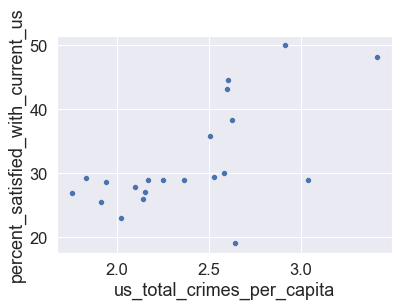

In [45]:
sns.scatterplot(data=df, x=df['us_total_crimes_per_capita'], y=df['percent_satisfied_with_current_us'])

These results are defeinitely surprising. It is important to remember that correlation does not equal causation. Going into this, I thought there might be a correlation between a larger percentage of people being unhappy with the current U.S. situation and a smaller amount of hate crimes, but it seems that hypothesis is not correct.

This pearsonr correlation shows a moderately strong correlation between the percentage of people satisfied with the current situation in the U.S. and the amount of hate crimes per capita across the U.S. (correlation of 0.63457 and p-value of 0.002).

Again, just because there is a correlation does not mean there is any causation. Common sense tells me this is most likely pure coincidental correlation. 

## Time Series Analysis

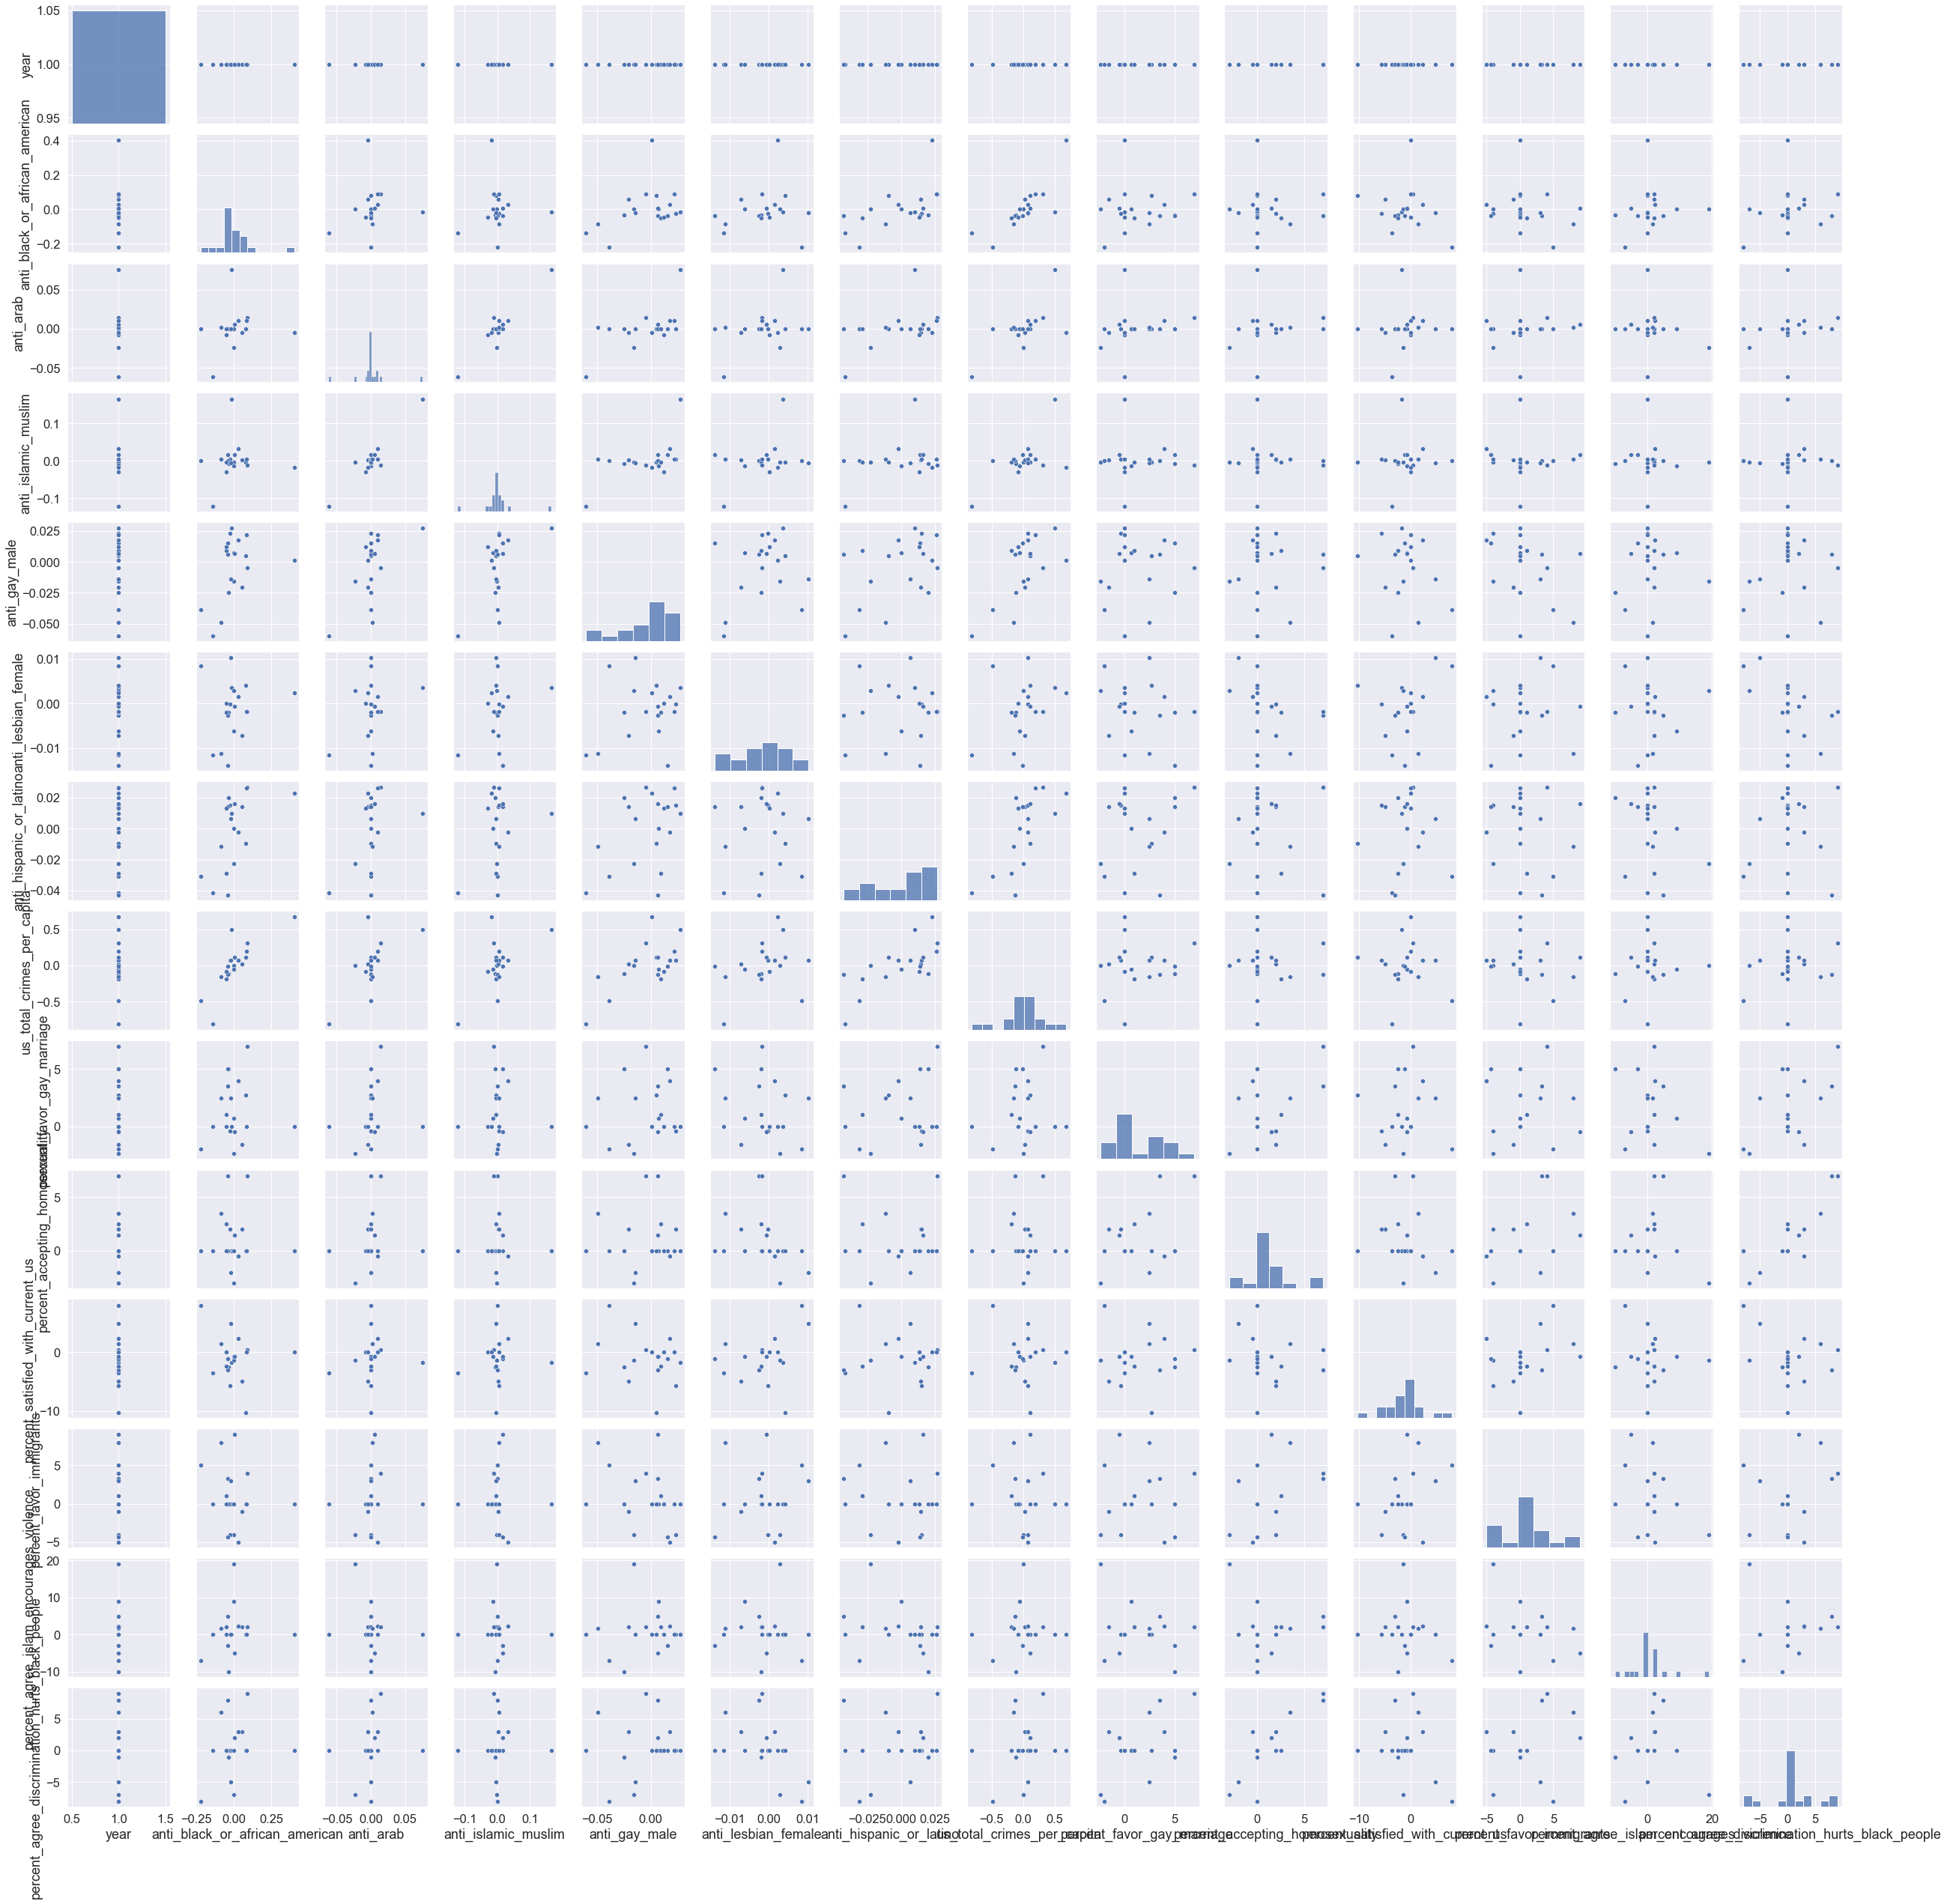

In [46]:
sns.pairplot(df.diff())

In [47]:
full_df = df.copy()

In [48]:
full_df.index = pd.period_range('2000','2020', freq='Y')
full_df

,year,anti_black_or_african_american,anti_arab,anti_islamic_muslim,anti_gay_male,anti_lesbian_female,anti_hispanic_or_latino,us_total_crimes_per_capita,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
2000,2000,1.04681,0.013526,0.010322,0.322123,0.068696,0.203952,2.912861,35.0,50.0,50.0,50.0,25.0,31
2001,2001,1.030158,0.089518,0.175863,0.349260,0.072248,0.213926,3.414407,35.0,50.0,48.2,50.0,25.0,31
2002,2002,0.891455,0.028284,0.054472,0.289470,0.060757,0.172146,2.602345,35.0,50.0,44.6,50.0,25.0,31
2003,2003,0.891099,0.004847,0.051583,0.273838,0.063699,0.149555,2.600756,32.6,47.0,43.2,46.0,44.0,24
2004,2004,0.948439,0.0,0.054197,0.253146,0.056598,0.163962,2.624611,31.0,49.0,38.3,45.0,46.0,27
2005,2005,0.91393,0.0,0.046903,0.228737,0.054720,0.183874,2.507812,36.0,49.0,35.8,45.0,36.0,26
2006,2006,0.891372,0.0,0.052513,0.251792,0.054533,0.19928,2.584289,35.6,51.0,30.1,41.0,36.0,26
2007,2007,0.893252,0.0,0.038344,0.259073,0.048347,0.199389,2.531278,36.3,51.0,29.4,41.0,45.0,26
2008,2008,0.975354,0.0,0.034681,0.263904,0.052517,0.189918,2.643591,39.0,51.0,19.1,41.0,45.0,26
2009,2009,0.753049,0.0,0.035033,0.225260,0.060899,0.159123,2.155676,37.0,51.0,27.1,46.0,38.0,18


In [49]:
full_df.drop(columns='year', inplace=True)

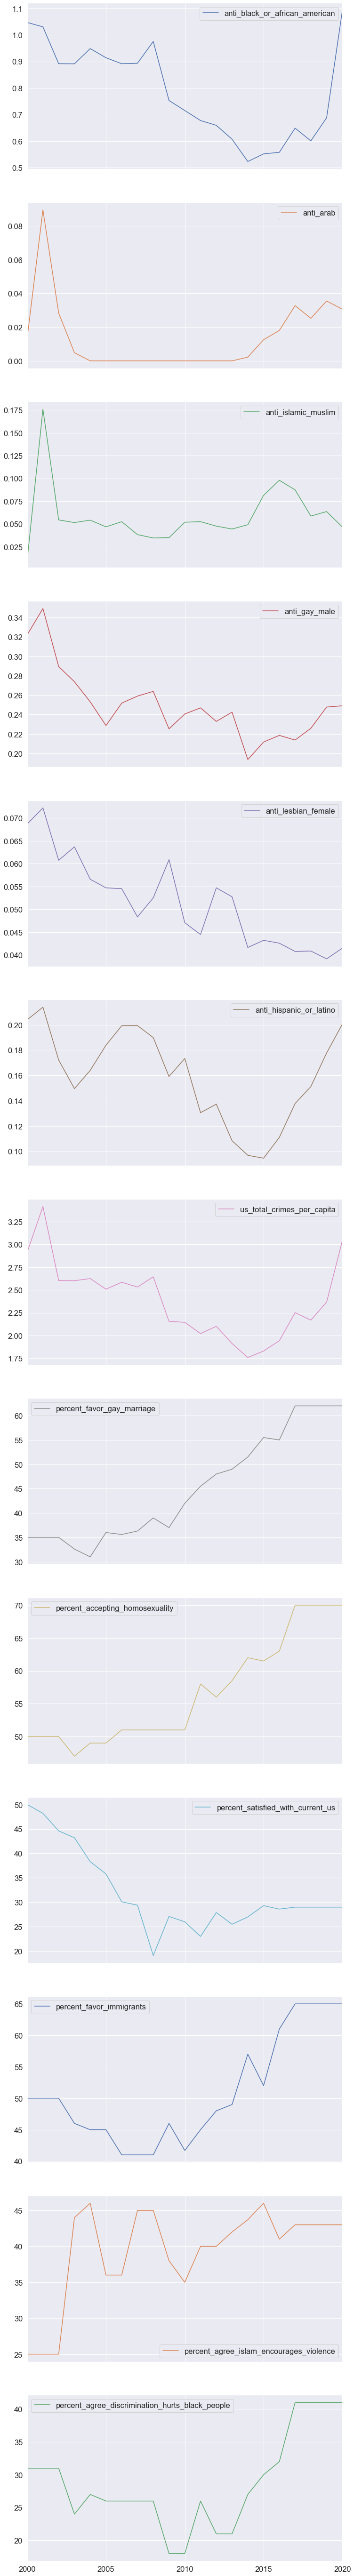

In [50]:
full_df.plot.line(subplots=True, figsize=(12,100));

In [51]:
predictors = df[['percent_accepting_homosexuality', 'percent_favor_gay_marriage']]

In [52]:
anti_gay = full_df['anti_gay_male']

anti_lesbian = full_df['anti_lesbian_female']

In [53]:
anti_gay_auto = pm.auto_arima(y=anti_gay, exogenous=predictors, suppress_warnings=False, maxiter=10000, stationary=False, trend="c")
anti_gay_auto.summary()

C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                        SARIMAX   Log Likelihood                  42.830
Date:                Wed, 23 Mar 2022   AIC                            -77.660
Time:                        20:32:50   BIC                            -73.482
Sample:                             0   HQIC                           -76.753
                                 - 21                                         
Covariance Type:                  opg                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                           0.0008      0.145      0.005      0.996      -0.283       0.284
percent_accepting_homosexuality     0.0131      0.005      2.499      0.012       0.003       0.023
percent_favor_gay_marriage         -0.0110      0.004     -3.024      0.002      -0.018      -0.004
sigma2                              0.0010      0.000      2.874      0.004       0.000       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.55   Prob(JB):                         0.88
Heteroskedasticity (H):               0.34   Skew:                             0.27
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

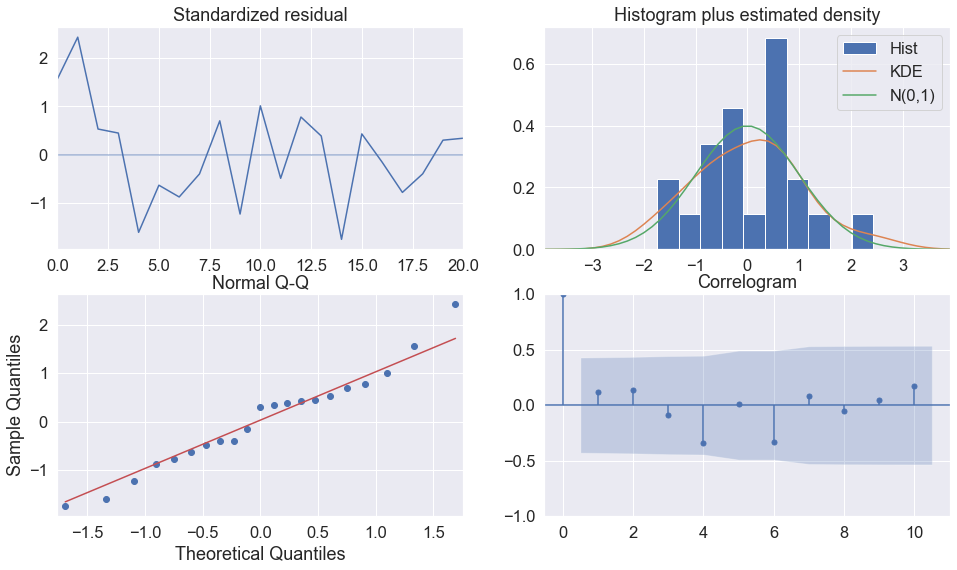

In [54]:
fig = plt.figure(figsize=(16,9))
anti_gay_auto.plot_diagnostics(fig=fig);

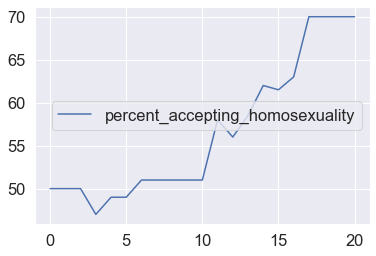

In [73]:
df[['percent_accepting_homosexuality']].plot();

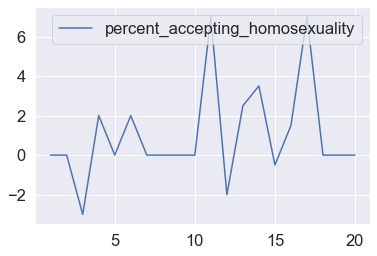

In [70]:
df[['percent_accepting_homosexuality']].diff().plot();

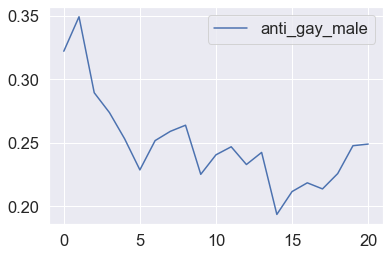

In [75]:
df[['anti_gay_male']].plot();

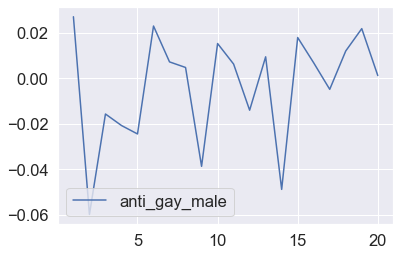

In [76]:
df[['anti_gay_male']].diff().plot();

In [57]:
x = df['anti_gay_male'].diff()
y = df['percent_accepting_homosexuality'].diff()

In [58]:
x = x[1:]

In [59]:
y = y[1:]

In [60]:
x

1     0.027137
2    -0.059790
3    -0.015632
4    -0.020692
5    -0.024408
6     0.023055
7     0.007281
8     0.004831
9    -0.038644
10    0.015353
11    0.006321
12   -0.013961
13    0.009518
14   -0.048782
15    0.017994
16    0.006863
17   -0.004785
18    0.012085
19    0.021906
20    0.001282
Name: anti_gay_male, dtype: float64

In [61]:
y

1     0.0
2     0.0
3    -3.0
4     2.0
5     0.0
6     2.0
7     0.0
8     0.0
9     0.0
10    0.0
11    7.0
12   -2.0
13    2.5
14    3.5
15   -0.5
16    1.5
17    7.0
18    0.0
19    0.0
20    0.0
Name: percent_accepting_homosexuality, dtype: float64

In [62]:
pearsonr(x=x, y=y)

(0.015166102588202827, 0.9493994550152097)

In [63]:
us_diff = df['percent_satisfied_with_current_us'].diff()
us_diff = us_diff[1:]

In [64]:
us = df['percent_satisfied_with_current_us']

<AxesSubplot:>

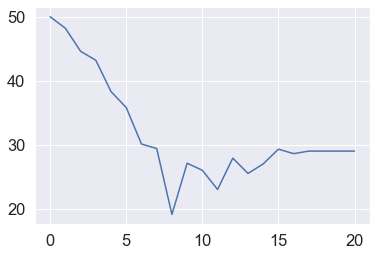

In [65]:
us.plot()

<AxesSubplot:>

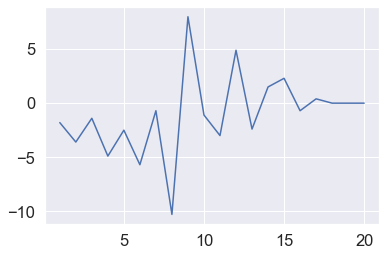

In [66]:
us_diff.plot()

In [67]:
anti_gay_diff = df['anti_gay_male'].diff()
anti_gay_diff = anti_gay_diff[1:]

In [68]:
us_diff

1     -1.8
2     -3.6
3     -1.4
4     -4.9
5     -2.5
6     -5.7
7     -0.7
8    -10.3
9      8.0
10    -1.1
11    -3.0
12     4.9
13    -2.4
14     1.5
15     2.3
16    -0.7
17     0.4
18     0.0
19     0.0
20     0.0
Name: percent_satisfied_with_current_us, dtype: float64

In [69]:
pearsonr(x=us_diff, y=anti_gay_diff)

(-0.21780175970519314, 0.3562868421926167)